In [20]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [21]:
train= pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

In [22]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [11]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

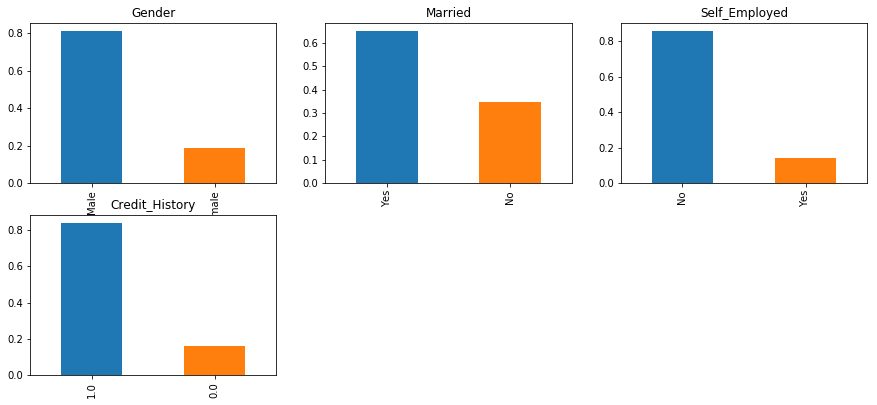

In [26]:
plt.figure(1) 
plt.subplot(331) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title= 'Gender') 
plt.subplot(332) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(333) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(334) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

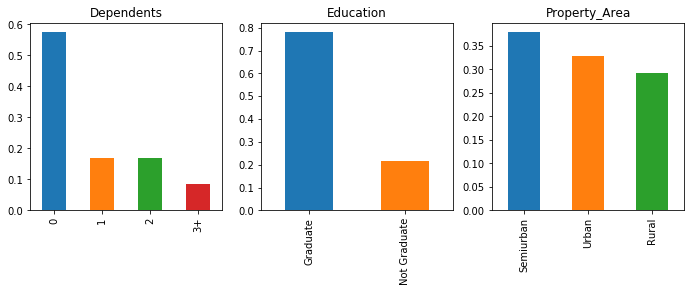

In [29]:
plt.figure(1) 
plt.subplot(551) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,20), title= 'Dependents') 
plt.subplot(552) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(553) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

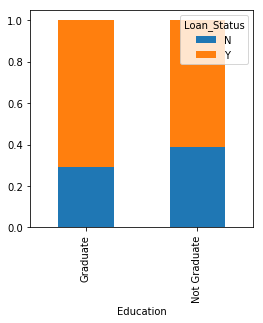

In [37]:
r=pd.crosstab(train["Education"], train["Loan_Status"])
r.div(r.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

### Now the training and test set are combined before data cleaning.

In [12]:
#add labels to distinguish betweeb train and test sets
train["data"]="train"
test["data"]="test"
df=pd.concat([train,test],sort=True)

In [13]:
df.shape

(981, 14)

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


### Missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
data                 981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


### Missing values

In [16]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
data                   0
dtype: int64

#### The missing values for Loan Status is related to test set which must be predicted.

In [17]:
df["Gender"].describe()

count      957
unique       2
top       Male
freq       775
Name: Gender, dtype: object

In [18]:
df["Self_Employed"].describe()

count     926
unique      2
top        No
freq      807
Name: Self_Employed, dtype: object

In [19]:
df["Dependents"].describe()

count     956
unique      4
top         0
freq      545
Name: Dependents, dtype: object

In [153]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True);
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#Since Credit history has only 1 and 0 values:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [121]:
df["LoanAmount"].describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [122]:
n=df.columns.get_loc("LoanAmount")
X=df.iloc[:,n:(n+1)].values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(X)
X = imputer.transform(X)
df["LoanAmount"]=X

In [126]:
n=df.columns.get_loc("Loan_Amount_Term")
X=df.iloc[:,n:(n+1)].values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(X)
X = imputer.transform(X)
df["Loan_Amount_Term"]=X

Text(0.5,1,'LoanAmount Distribution')

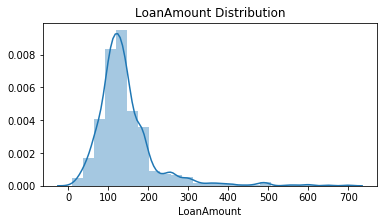

In [154]:
plt.figure(figsize=(6,3))
sns.distplot(df["LoanAmount"], bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.title("LoanAmount Distribution")

In [155]:
print("The skewness is %f"%df["LoanAmount"].skew())
print("The Kurtosis is %f"%df["LoanAmount"].kurt())

The skewness is 2.752055
The Kurtosis is 11.954982


In [156]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])

Text(0.5,1,'LoanAmount_log Distribution')

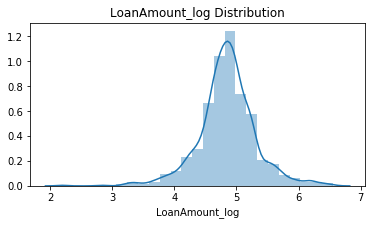

In [157]:
plt.figure(figsize=(6,3))
sns.distplot(df["LoanAmount_log"], bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.title("LoanAmount_log Distribution")

In [158]:
print("The skewness is %f"%df["LoanAmount_log"].skew())
print("The Kurtosis is %f"%df["LoanAmount_log"].kurt())

The skewness is -0.215029
The Kurtosis is 2.695000


In [159]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [160]:
print("The skewness is %f"%df["TotalIncome"].skew())
print("The Kurtosis is %f"%df["TotalIncome"].kurt())

The skewness is 6.042453
The Kurtosis is 53.488188


Text(0.5,1,'TotalIncome Distribution')

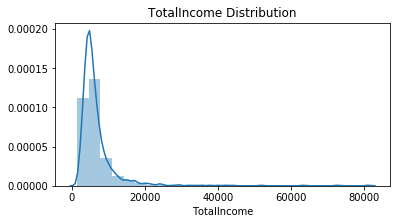

In [161]:
plt.figure(figsize=(6,3))
sns.distplot(df["TotalIncome"], bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.title("TotalIncome Distribution")

In [162]:
df["TotalIncome_log"]=np.log(df["TotalIncome"])

Text(0.5,1,'TotalIncome_log Distribution')

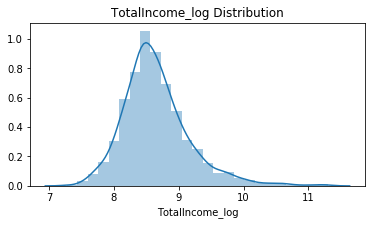

In [163]:
plt.figure(figsize=(6,3))
sns.distplot(df["TotalIncome_log"], bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.title("TotalIncome_log Distribution")

In [164]:
print("The skewness is %f"%df["TotalIncome_log"].skew())
print("The Kurtosis is %f"%df["TotalIncome_log"].kurt())

The skewness is 1.123475
The Kurtosis is 2.759200


In [165]:
df["Property_Area"].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

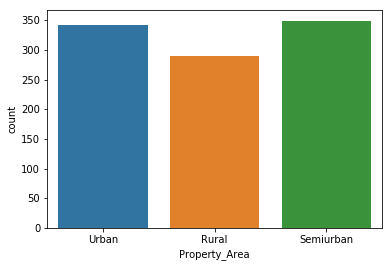

In [166]:
sns.countplot(df["Property_Area"])

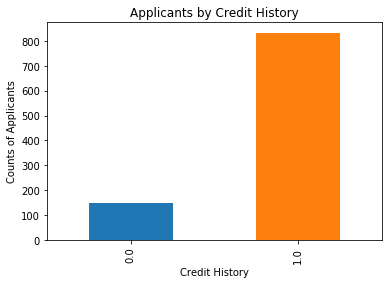

In [167]:
data = df['Credit_History'].value_counts(ascending=True)
data2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())


plt.figure(figsize=(6,4))
plt.xlabel("Credit History")
plt.ylabel("Counts of Applicants")
plt.title("Applicants by Credit History")
data.plot(kind="bar")


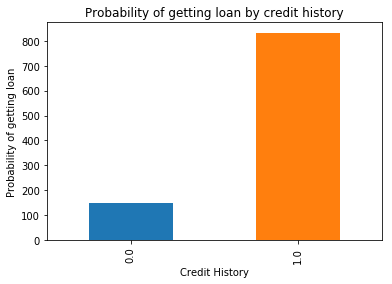

In [168]:
data2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())


plt.figure(figsize=(6,4))
plt.xlabel("Credit History")
plt.ylabel('Probability of getting loan')
plt.title("Probability of getting loan by credit history")
data.plot(kind="bar")


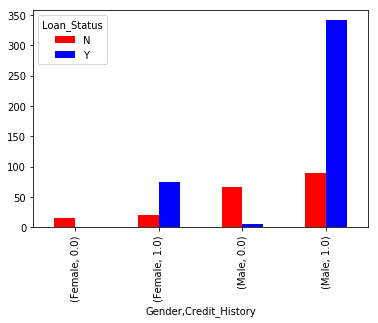

In [169]:
data3=pd.crosstab([df["Gender"],df["Credit_History"]],df["Loan_Status"])
data3
data3.plot(kind="bar",grid=False,color=["red","blue"])

In [170]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID',
       'Loan_Status', 'Married', 'Property_Area', 'Self_Employed', 'data',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [171]:
df_corr = df.drop(['Loan_ID','Loan_Status', "TotalIncome","LoanAmount"],axis=1)

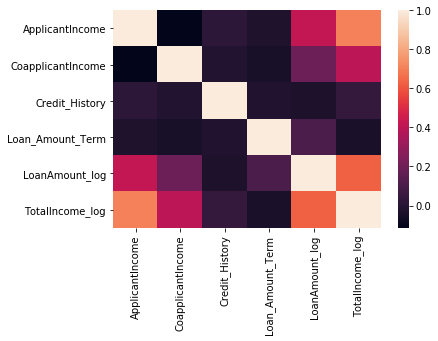

In [172]:
sns.heatmap(df_corr.corr())


In [173]:
 from sklearn.preprocessing import LabelEncoder

In [174]:
varaibles_to_transform= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [175]:
l=LabelEncoder()

In [176]:
for i in varaibles_to_transform:  
    df[i]=l.fit_transform(df[i].astype(str))
    

In [177]:
train1=df.loc[df["data"]=="train"]
test1 = df.loc[df['data']=="test"]

In [178]:
test1.drop(['data'],axis=1,inplace=True)
train1.drop(['data'],axis=1,inplace=True)

In [179]:
train1.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,LoanAmount_log,TotalIncome,TotalIncome_log
0,5849,0.0,1.0,0,0,1,142.51153,360.0,LP001002,1,0,2,0,4.959423,5849.0,8.674026
1,4583,1508.0,1.0,1,0,1,128.00000,360.0,LP001003,0,1,0,0,4.852030,6091.0,8.714568
2,3000,0.0,1.0,0,0,1,66.00000,360.0,LP001005,1,1,2,1,4.189655,3000.0,8.006368
3,2583,2358.0,1.0,0,1,1,120.00000,360.0,LP001006,1,1,2,0,4.787492,4941.0,8.505323
4,6000,0.0,1.0,0,0,1,141.00000,360.0,LP001008,1,0,2,0,4.948760,6000.0,8.699515


In [181]:
from sklearn.cross_validation import KFold

In [130]:
kf=KFold(df.shape[0],n_folds=5)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [189]:
def model_prediction(model,data,test,predictors,outcome):
    error=[]
    X=data[predictors].values
    y=data[outcome].values
    if len(predictors)==1:
        X=X.reshape(-1,1)
    model.fit(X,y)
    predictions=model.predict(X)
    accuracy=metrics.accuracy_score(predictions,y)

    accuracies = cross_val_score(estimator=model, X=data[predictors], y=data[outcome], cv=10)
    accuracies.mean()
    #accuracies.std()
    print ("CV Score : %s" % "{0:.4%}".format(accuracies.mean()))
    print("Accuracy %s"%"{0:.4%}".format(accuracy))


    
    
    
    
    #Fit the model again so that it can be refered outside the function:
    #X_test=test[predictors]
    #model.fit(X_test,test[outcome]) 

In [153]:
outcome= 'Loan_Status'

In [197]:
model = LogisticRegression()
predictors=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
x=train1[predictors].values
y=train1["Loan_Status"].values
model.fit(x,y)
predictions=model.predict(x)

accuracy=metrics.accuracy_score(predictions,y)

accuracies = cross_val_score(model,x,y, cv=10,  scoring="accuracy")
accuracies.mean()
accuracies.std()
print ("CV Score : %s" % "{0:.4%}".format(accuracies.mean()))
print("Accuracy %s"%"{0:.4%}".format(accuracy))


CV Score : 80.9446%
Accuracy 80.9446%


In [198]:
model = LogisticRegression()
predictors=['Credit_History','Gender','Married','Education']
x=train1[predictors].values
y=train1["Loan_Status"].values
model.fit(x,y)
predictions=model.predict(x)

accuracy=metrics.accuracy_score(predictions,y)

accuracies = cross_val_score(model,x,y, cv=10,  scoring="accuracy")
accuracies.mean()
accuracies.std()
print ("CV Score : %s" % "{0:.4%}".format(accuracies.mean()))
print("Accuracy %s"%"{0:.4%}".format(accuracy))


CV Score : 80.9446%
Accuracy 80.9446%


In [183]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
model_prediction(model, train1,test1,predictor_var,outcome)

CV Score : 80.9446%
Accuracy 80.9446%


In [191]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
model_prediction(model, train1,test1,predictor_var,outcome)

CV Score : 80.9446%
Accuracy 80.9446%


In [196]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
model_prediction(model, train1,test1,predictor_var,outcome)

CV Score : 78.9930%
Accuracy 100.0000%


In [197]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.270133
Credit_History      0.269365
LoanAmount_log      0.221477
Property_Area       0.050913
Dependents          0.049926
Loan_Amount_Term    0.043154
Education           0.026648
Married             0.024904
Self_Employed       0.022160
Gender              0.021319
dtype: float64


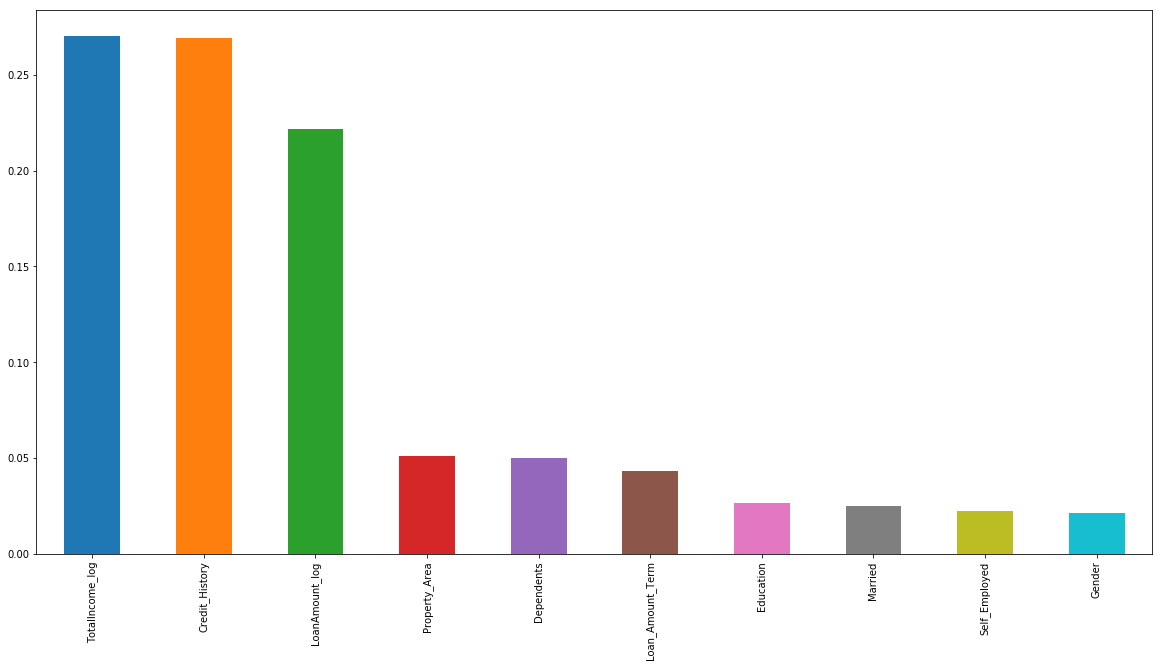

In [199]:
featimp.plot(kind='bar', figsize=(20, 10))

In [200]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
model_prediction(model, train1,test1,predictor_var,outcome)

CV Score : 80.7858%
Accuracy 82.7362%


In [202]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
model_prediction(model, train1,test1,predictor_var,outcome)

CV Score : 80.4528%
Accuracy 80.6189%
